In [5]:
import numpy as np
import pandas as pd

In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [7]:
key_1=pd.read_csv(r"D:\Rohan\ML\Datasets\web-traffic-time-series-forecasting\key_1.csv")
key_2=pd.read_csv(r"D:\Rohan\ML\Datasets\web-traffic-time-series-forecasting\key_2.csv")

sample_submission_1=pd.read_csv(r"D:\Rohan\ML\Datasets\web-traffic-time-series-forecasting\sample_submission_1.csv")
sample_submission_2=pd.read_csv(r"D:\Rohan\ML\Datasets\web-traffic-time-series-forecasting\sample_submission_2.csv")

train_1=pd.read_csv(r"D:\Rohan\ML\Datasets\web-traffic-time-series-forecasting\train_1.csv")
train_2=pd.read_csv(r"D:\Rohan\ML\Datasets\web-traffic-time-series-forecasting\train_2.csv")

In [8]:
train_1.head()
train_1.shape

(145063, 551)

In [9]:
#mean imputation
visits_columns = train_1.columns.drop('Page')
means = train_1[visits_columns].mean()
train1_imputed = train_1.copy()
train1_imputed[visits_columns] = train1_imputed[visits_columns].fillna(means)
train1_imputed.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.000000,11.000000,5.000000,13.000000,14.0000,9.00000,9.000000,22.000000,26.000000,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.000000,14.000000,15.000000,18.000000,11.0000,13.00000,22.000000,11.000000,10.000000,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.000000,0.000000,1.000000,1.000000,0.0000,4.00000,0.000000,3.000000,4.000000,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.000000,13.000000,10.000000,94.000000,4.0000,26.00000,14.000000,9.000000,11.000000,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,1195.856567,1204.003638,1133.675969,1170.437324,1217.7693,1290.27319,1239.136754,1193.092122,1197.991772,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [58]:
#extracting a stationary time series and a non-stationary time series
stationary_page_name=train1_imputed["Page"][2]
stationary_page_row=train1_imputed[train1_imputed["Page"]==stationary_page_name]
stationary_time_series=stationary_page_row.drop(columns=["Page"])
stationary_time_series=stationary_time_series.values.flatten()


non_stationary_page_name=train1_imputed["Page"][145000]
nonstationary_page_row=train1_imputed[train1_imputed["Page"]==non_stationary_page_name]
nonstationary_time_series=nonstationary_page_row.drop(columns=["Page"])
nonstationary_time_series=nonstationary_time_series.values.flatten()

In [59]:
# checking whether data of 1 page is stationary or not
from arch.unitroot import ADF, PhillipsPerron
from statsmodels.tsa.stattools import kpss



"""
# Perform KPSS test
kpss_stat, kpss_pvalue, kpss_critical_values = kpss(stationary_time_series, regression='c')


"""

# Perform ADF test
adf_test = ADF(stationary_time_series)
adf_stat = adf_test.stat
adf_pvalue = adf_test.pvalue
adf_critical_values = adf_test.critical_values


# Perform Phillips-Perron test
pp_test = PhillipsPerron(stationary_time_series)
pp_stat = pp_test.stat
pp_pvalue = pp_test.pvalue
pp_critical_values = pp_test.critical_values

# KPSS test
kpss_stat, kpss_pvalue, kpss_lags, kpss_critical_values= kpss(stationary_time_series, regression='c')



adf_result = adf_pvalue < 0.05
pp_result = pp_pvalue < 0.05
kpss_result = kpss_pvalue > 0.05


# Store results in a DataFrame
stationarity_results = pd.DataFrame({
    'Test': ['ADF', 'Phillips-Perron', 'KPSS'],
    'Statistic': [adf_stat, pp_stat, kpss_stat],
    'p-value': [adf_pvalue, pp_pvalue, kpss_pvalue],
    '1% Critical Value': [adf_critical_values.get('1%'), pp_critical_values.get('1%'), kpss_critical_values.get('1%')],
    '5% Critical Value': [adf_critical_values.get('5%'), pp_critical_values.get('5%'), kpss_critical_values.get('5%')],
    '10% Critical Value': [adf_critical_values.get('10%'), pp_critical_values.get('10%'), kpss_critical_values.get('10%')],
    'Stationarity': [adf_result, pp_result, kpss_result]
})

stationarity_results.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13136\1271918840.py:30: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_pvalue, kpss_lags, kpss_critical_values= kpss(stationary_time_series, regression='c')


,Test,Statistic,p-value,1% Critical Value,5% Critical Value,10% Critical Value,Stationarity
0,ADF,-11.980276,3.718817e-22,-3.442339,-2.866829,-2.569587,True
1,Phillips-Perron,-15.927343,7.800199e-29,-3.442317,-2.866819,-2.569582,True
2,KPSS,0.223327,1.000000e-01,0.739000,0.463000,0.347000,True


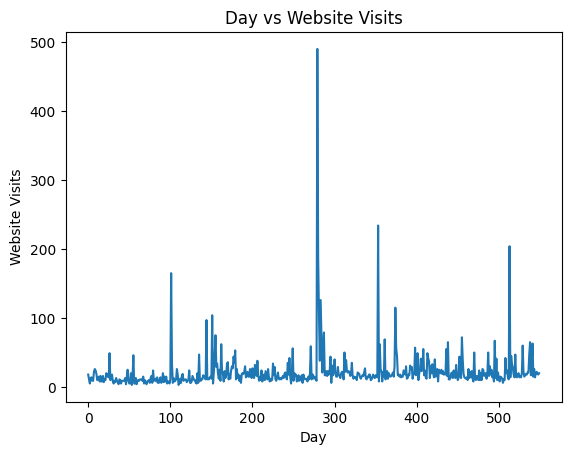

In [11]:
#visualizing data of 1 page

import matplotlib.pyplot as plt

website_visits=train1_imputed.iloc[:,1:]

plt.plot(website_visits.iloc[0].values.flatten())
plt.xlabel('Day')
plt.ylabel('Website Visits')
plt.title('Day vs Website Visits')
plt.show()


In [12]:
website_visits.head()
website_visits.shape

(145063, 550)

In [14]:
stationary_time_series.shape

(550,)

In [15]:
nonstationary_time_series.shape

(550,)

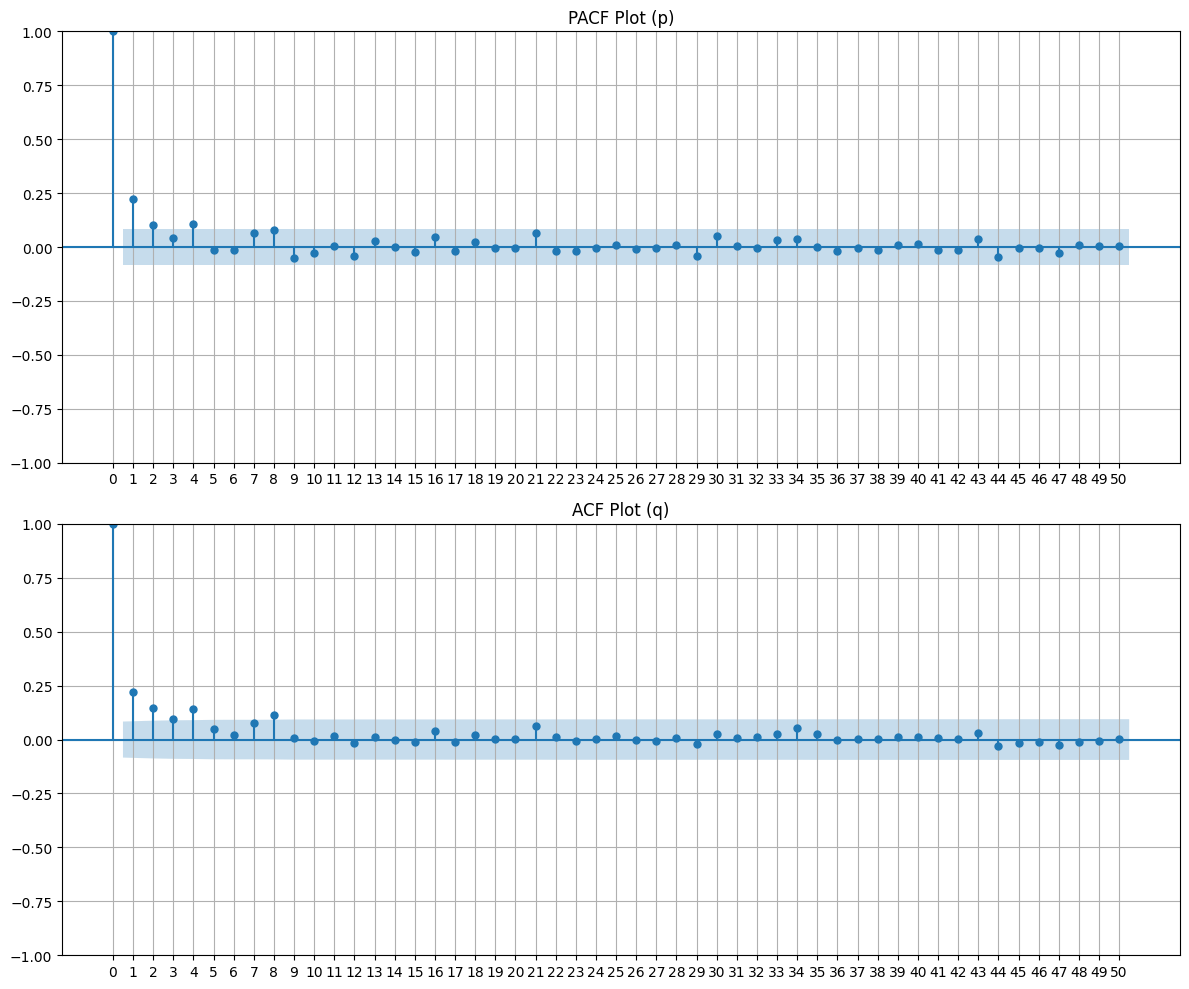

In [16]:
"""
p - PACF plot, point where plot cuts off
d - 0, since data is already stationary, no need to do differencing
q - ACF plot, point where plot cuts off

the cutoff value in a PACF plot is the value on x-axis where the values start getting in the highlighted range (confidence interval band)

If your time series has 550 observations, specifying lags=50 means that the partial autocorrelation will be calculated for the
first lag up to the 50th lag, taking into account all 550 data points for each lag's calculation.

"""

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

plot_pacf(stationary_time_series, lags=50, ax=ax[0])
ax[0].set_title('PACF Plot (p)')
ax[0].set_xticks(np.arange(0, 51, 1))
ax[0].grid(True)

plot_acf(stationary_time_series, lags=50, ax=ax[1])
ax[1].set_title('ACF Plot (q)')
ax[1].set_xticks(np.arange(0, 51, 1))
ax[1].grid(True)

plt.tight_layout()
plt.show()

# (p,d,q) is (3,0,3)

In [17]:
#for the stationary page
from statsmodels.tsa.arima.model import ARIMA

def fit_arima_single(time_series, order=(1, 0, 1)):
    model = ARIMA(time_series, order=order)
    model_fit = model.fit()
    
    return model_fit

model_fit = fit_arima_single(stationary_time_series)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  550
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2620.507
Date:                Thu, 01 Aug 2024   AIC                           5249.015
Time:                        19:07:28   BIC                           5266.255
Sample:                             0   HQIC                          5255.752
                                - 550                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7489      3.957      5.496      0.000      13.993      29.504
ar.L1          0.7585      0.071     10.736      0.000       0.620       0.897
ma.L1         -0.5857      0.076     -7.749      0.000      -0.734      -0.438
sigma2       805.1486     11.032     72.983      0.000     783.526     826.771
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):            511814.26
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            10.23
Prob(H) (two-sided):                  0.09   Kurtosis:                       151.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

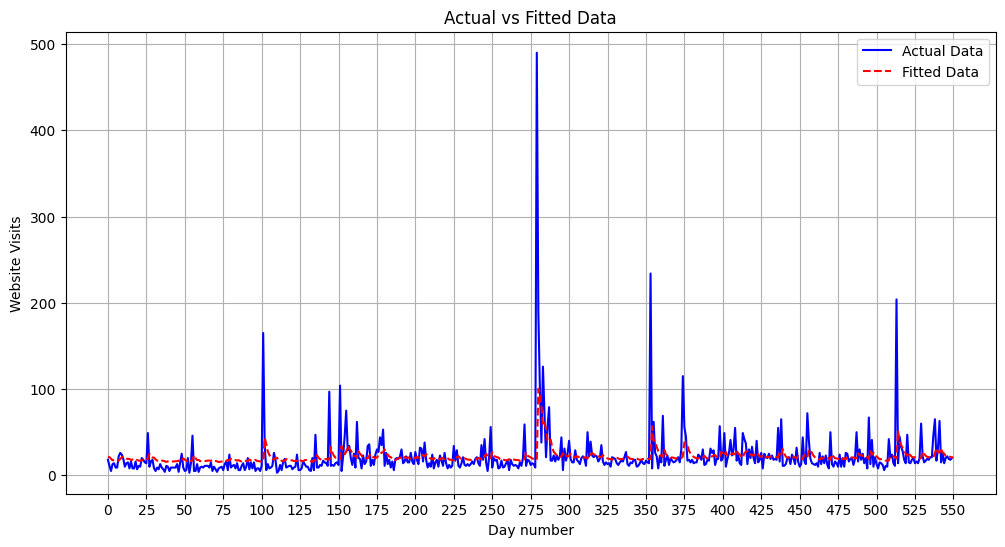

In [18]:
#displaying actual and predicted data

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


forecast = model_fit.predict(start=0, end=550)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(stationary_time_series, label='Actual Data', color='blue')
plt.plot(forecast, label='Fitted Data', color='red', linestyle='--')
plt.title('Actual vs Fitted Data')
plt.xlabel('Day number')
plt.ylabel('Website Visits')
plt.legend()
plt.xticks(np.arange(0, 551, 25))
plt.grid(True)
plt.show()


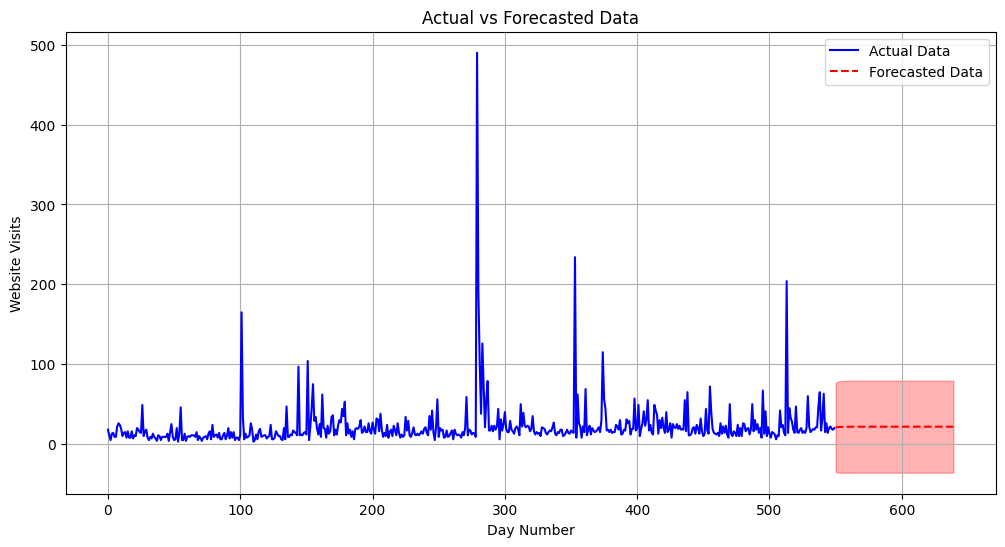

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already fitted the ARIMA model as model_fit

# Forecast next 90 days
forecast_steps = 90
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate index for the forecast period
forecast_index = np.arange(len(stationary_time_series), len(stationary_time_series) + forecast_steps)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(stationary_time_series, label='Actual Data', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecasted Data', color='red', linestyle='--')
plt.fill_between(forecast_index, forecast_conf_int[:, 0], forecast_conf_int[:, 1], color='red', alpha=0.3)
plt.title('Actual vs Forecasted Data')
plt.xlabel('Day Number')
plt.ylabel('Website Visits')
plt.legend()
plt.grid(True)
plt.show()
